# Proyecto 1 - Análitica de Textos 

Camilo Andrés Castilla 202122138 <br>
Sara Martinez 202221055

## Parte 2: Preparación y Entendimiento de Datos

### Introducción al Dataset y Carga de los Datos

In [400]:
# Importamos pandas para manejar el dataset
import pandas as pd

df = pd.read_excel('Datos_proyecto.xlsx')

# Primeras filas de los datos para entender mejor su estructura
print("Primeras 5 filas del dataset:")
pd.set_option("display.max_colwidth", None)  # muestra todo el texto sin cortar
display(df.head())



Primeras 5 filas del dataset:


,textos,labels
0,"""Aprendizaje"" y ""educación"" se consideran sinónimos de escolarización formal. Las organizaciones auxiliares, como las editoriales de educación, las juntas examinadoras y las organizaciones de formación de docentes, se consideran extensiones de los acuerdos establecidos por los gobiernos. Este marco de comprensión se ha vuelto cada vez más inadecuado.",4
1,"Para los niños más pequeños (bebés y niños pequeños), la capacitación especializada y práctica parece estar más fuertemente asociada con la calidad pedagógica y los resultados cognitivos y sociales. Los educadores de la primera infancia se encuentran con entornos sociales cada vez más complejos y se encuentran con una multiplicidad de antecedentes y experiencias familiares. Estos factores crean imperativos para adoptar nuevas pedagogías y prácticas organizacionales para acomodar este pluralismo (Elliott, 2006).",4
2,"Además, la formación de especialistas en medicina general también incluye tareas que requieren un conocimiento más profundo de problemas comunes de salud pública, incluida la salud mental (Cuestionario de salud mental de la OCDE, 2013). Dado que no hay control en la atención primaria para limitar el acceso a los servicios de salud (mental) especializados, muchos pacientes que necesitan tratamiento (para trastornos mentales graves en particular) pueden buscar atención de nivel especializado directamente. Los servicios de especialistas en psiquiatría se brindan principalmente en las salas ambulatorias de psiquiatría ubicadas en los hospitales generales.",3
3,"En los países de la OCDE se tiende a pasar de los cursos obligatorios a los optativos, abiertos a estudiantes de distintas facultades y escuelas. Este planteamiento facilita la formación de equipos de estudiantes con distintas formaciones e intereses. El trabajo en equipos interdisciplinares permite a los individuos concentrarse en lo que mejor saben y les gusta y, al mismo tiempo, familiarizarse con nuevos conocimientos que pueden asociarse a una nueva forma de resolver un problema o crear un nuevo producto o servicio. No está claro hasta qué punto estos cursos utilizan métodos pedagógicos creativos y se adaptan a las necesidades de los estudiantes de grado, postgrado y licenciatura.",4
4,"Este grupo se centró en las personas que padecen trastornos mentales con comorbilidad de abuso de sustancias (mientras que la demencia, la discapacidad intelectual y el abuso de sustancias por sà solos quedaron excluidos del ámbito de análisis). Con 90 millones de euros de financiación, la comisión dispuso de tres años para ""iniciar y apoyar el desarrollo de proyectos a todos los niveles (tratamiento médico, mejora de los servicios, proyectos de vivienda, mejoras legislativas y organizativas) y proponer las medidas necesarias para elevar de forma permanente el nivel de los servicios de salud mental"".",3


In [401]:
# Obtención de información general sobre las columnas y tipos de datos
print("\nInformación general del dataset:")
df.info()


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2424 entries, 0 to 2423
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   textos  2424 non-null   object
 1   labels  2424 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 38.0+ KB


### Análisis descriptivo de la columna <span style="color:blue;"><em>textos</em></span>
En esta sección nos centraremos en analizar el campo "textos" del dataset.

Este campo contiene las opiniones de los ciudadanos escritas en lenguaje natural. Cada fila corresponde a un comentario o opinión que refleja la percepción de una persona sobre algún tema relacionado con los Objetivos de Desarrollo Sostenible (ODS).
Nuestro objetivo es entender la calidad, cantidad y características textuales de esta información para preparar análisis posteriores.

In [402]:
# Verificamos nulos y vacíos en la columna Description
num_nulls = df['textos'].isnull().sum()
num_empty = (df['textos'].str.strip() == '').sum()

print(f"Número de valores nulos en 'textos': {num_nulls}")
print(f"Número de valores vacíos en 'textos': {num_empty}")

Número de valores nulos en 'textos': 0
Número de valores vacíos en 'textos': 0


In [403]:
# Calculamos longitud de cada texto
df['text_length'] = df['textos'].str.len()

In [404]:
# Estadísticas básicas sobre la longitud
text_lenght_stats = df['text_length'].describe()
print("\nEstadísticas básicas de longitud de los textos:")
print(text_lenght_stats)


Estadísticas básicas de longitud de los textos:
count    2424.000000
mean      683.223185
std       223.563695
min       303.000000
25%       513.000000
50%       647.000000
75%       809.250000
max      1492.000000
Name: text_length, dtype: float64


In [405]:
# Visualización de algunas muestras representativas
print("\nEjemplos de textos:")
display(df[['textos', 'labels']].sample(5, random_state=42))


Ejemplos de textos:


,textos,labels
1490,"Por lo general, se entiende que los trastornos de leves a moderados no requieren tratamientos altamente especializados administrados por psiquiatras o en entornos hospitalarios en la gran mayoría de los casos. En cambio, en la mayoría de los países de la OCDE, los médicos de atención primaria asumen un papel de liderazgo en el tratamiento de trastornos leves a moderados (ver Tabla 4.2). Cuando la provisión a nivel de atención primaria para los trastornos leves a moderados está respaldada por una buena capacitación (tanto durante la capacitación médica como como parte de la educación médica continua), por el apoyo de profesionales especialistas en atención de la salud mental y redes de apoyo, y por buenas opciones de derivación si un paciente necesita acceder a un nivel de atención más especializado, puede ser una forma muy eficaz de brindar atención a un gran número de pacientes.",3
387,"En la mayoría de los contratos, el objetivo es llegar a cuatro o cinco pacientes por hora, cumpliendo también con los estándares de calidad especificados. En la encuesta nacional de salud de 2006, por ejemplo, el 31% de la población reportó obtener servicios de salud del sector privado al menos una vez al año, independientemente de su cobertura bajo la CCSS. En 2009, el 60% de los encuestados afirmó que prefería proveedores privados de atención médica (Gutiérrez, 2009).",3
1419,"Las tasas de consumo de alcohol y tabaquismo no han disminuido y se encuentran entre las más altas de la UE. Las tasas de obesidad, aunque siguen siendo más bajas que en muchos otros países de la UE, están aumentando tanto en adultos como en adolescentes. Alentadoramente, las tasas de tabaquismo entre los adolescentes disminuyeron en los últimos años y Austria finalmente se está poniendo al día con otros países de la UE en términos de políticas para la protección de los no fumadores, por ejemplo, mediante la introducción de una prohibición total de fumar en restaurantes y bares. Se pusieron en marcha Planes Nacionales de Acción sobre Nutrición y Actividad Física para contrarrestar el aumento de la obesidad.",3
410,"Hubo una disminución constante en el porcentaje de estudiantes que afirmaron un alto nivel de satisfacción con la vida, con proporciones más bajas para las niñas en comparación con los niños para cada año de administración de la encuesta (con la excepción de 2006). Una tendencia notable que surgió del análisis de los datos fue la asociación entre un fuerte apoyo social, particularmente el apoyo familiar, y una alta satisfacción con la vida. Este hallazgo subraya el papel fundamental que desempeñan las relaciones positivas y las redes sociales sólidas para contribuir y mejorar el bienestar psicológico de los estudiantes. (Morrison y Peterson, 2016, págs.",4
482,"La oferta insuficiente de programas vocacionales de alta calidad y lugares de estudio de educación terciaria obstaculiza la formación y el crecimiento del capital humano. Estabilizar y simplificar la educación vocacional al enfocarse más en aprendizajes de alta calidad apoyaría la participación. El gobierno necesita encontrar medidas eficientes para aumentar la participación, especialmente entre los niños de familias de bajos ingresos, para reemplazar el subsidio de mantenimiento educativo abolido. Reformas adicionales a la financiación de la educación superior podrían reducir los costos de los contribuyentes y ayudar a financiar una expansión necesaria en el sector. The Implications of School Fundingâ€, CfBT Education Trust Research Paper. Medición de la variación en la efectividad de los maestros en Inglaterra"", documento de trabajo 09/212 del Centro para el Mercado y la Organización Pública, Universidad de Bristol.",4


In [406]:
#Verificamos ahora si la columna labels tiene algun valor vacio
df['labels'].isnull().any()


np.False_

<Figure size 1000x600 with 0 Axes>

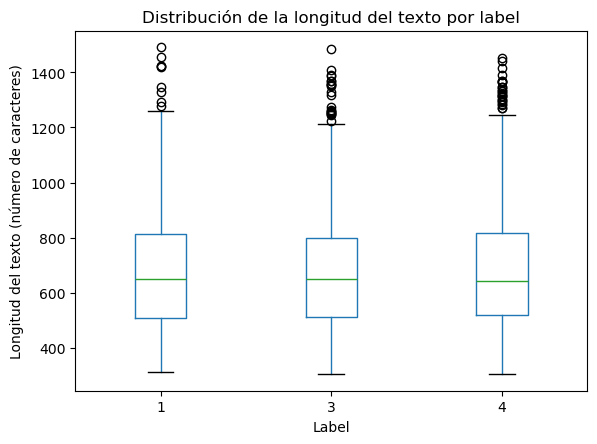

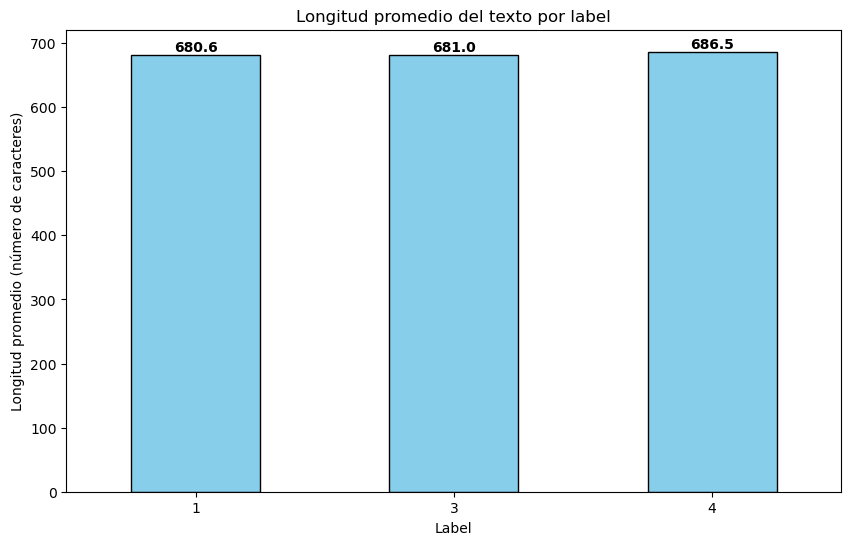

In [407]:
import matplotlib.pyplot as plt

#Como no hay ningun valor vacio podemos continuar
#Ahora, parece interesante ver un grafico que muestre la longitud de las palabras dependiendo de su label a ver si
#pudiera existir alguna relación entre su longitud y la clasificación que tiene 

# Agrupamos para calcular las estadisticas por label 
grouped = df.groupby('labels')['text_length'].agg(['mean', 'min', 'max']).dropna()


#Primero queremos ver un boxplot para cada label 
plt.figure(figsize=(10,6))
df.boxplot(column='text_length', by='labels', grid=False)
plt.title('Distribución de la longitud del texto por label')
plt.suptitle('')  # quita el título automático de pandas
plt.xlabel('Label')
plt.ylabel('Longitud del texto (número de caracteres)')
plt.show()

#Ahora queremos ver simplemente el promedio
grouped = df.groupby('labels')['text_length'].mean()

grouped = df.groupby('labels')['text_length'].mean()

plt.figure(figsize=(10,6))
bars = grouped.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Longitud promedio del texto por label')
plt.xlabel('Label')
plt.ylabel('Longitud promedio (número de caracteres)')
plt.xticks(rotation=0)

# Agregar los valores encima de cada barra
for i, valor in enumerate(grouped):
    plt.text(i, valor + 1, f"{valor:.1f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.show()



Con base en los boxplots, es posible ver que para cada label hay cierto número de outliers. Esto indica que para cada label, hay textos con un número de caracteres muy alto, lo cual no necesariamente indica un error sino que los textos muy largos son poco frecuentes. De igual forma, el boxplot indica que los textos de cada label son altamente homogeneos, teniendo en cuenta que tienen una media y distribución similar. 

### Procesamiento de texto: tokenización y limpieza de palabras

Vamos a procesar el texto de los datos para hacer un análisis basado en las palabras. Usaremos el campo "textos" y transformaremos cada texto en una lista de palabras limpias y significativas. Este paso lo vamos a usar para realizar un análisis posterior de frecuencia y relevancia de palabras. 

In [408]:
import nltk
import string
import pandas as pd
from nltk.corpus import stopwords

# Descargar stopwords si no están ya descargadas
nltk.download('stopwords')

# Definir las stopwords en español (todos los textos están en español)
stop_words = set(stopwords.words('spanish'))
stop_words.update([
    "pueden", "puede","si","ser","ademas","además","menos",
    "cada","embargo","mayor","datos",
    "años","parte","número","tiempo","mientras",
    "deben","general","solo","ejemplo","promedio","nacional","dos","mayoría"
])

# Función para limpiar y tokenizar texto
def clean_tokenize(text):
    if pd.isnull(text):
        return []
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

# Aplicar la función a la columna 'textos'
df['tokens'] = df['textos'].apply(clean_tokenize)

print("Ejemplos de tokens en los primeros textos:")
display(df[['textos', 'tokens']].head())



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/camilo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Ejemplos de tokens en los primeros textos:


,textos,tokens
0,"""Aprendizaje"" y ""educación"" se consideran sinónimos de escolarización formal. Las organizaciones auxiliares, como las editoriales de educación, las juntas examinadoras y las organizaciones de formación de docentes, se consideran extensiones de los acuerdos establecidos por los gobiernos. Este marco de comprensión se ha vuelto cada vez más inadecuado.","[aprendizaje, educación, consideran, sinónimos, escolarización, formal, organizaciones, auxiliares, editoriales, educación, juntas, examinadoras, organizaciones, formación, docentes, consideran, extensiones, acuerdos, establecidos, gobiernos, marco, comprensión, vuelto, vez, inadecuado]"
1,"Para los niños más pequeños (bebés y niños pequeños), la capacitación especializada y práctica parece estar más fuertemente asociada con la calidad pedagógica y los resultados cognitivos y sociales. Los educadores de la primera infancia se encuentran con entornos sociales cada vez más complejos y se encuentran con una multiplicidad de antecedentes y experiencias familiares. Estos factores crean imperativos para adoptar nuevas pedagogías y prácticas organizacionales para acomodar este pluralismo (Elliott, 2006).","[niños, pequeños, bebés, niños, pequeños, capacitación, especializada, práctica, parece, fuertemente, asociada, calidad, pedagógica, resultados, cognitivos, sociales, educadores, primera, infancia, encuentran, entornos, sociales, vez, complejos, encuentran, multiplicidad, antecedentes, experiencias, familiares, factores, crean, imperativos, adoptar, nuevas, pedagogías, prácticas, organizacionales, acomodar, pluralismo, elliott, 2006]"
2,"Además, la formación de especialistas en medicina general también incluye tareas que requieren un conocimiento más profundo de problemas comunes de salud pública, incluida la salud mental (Cuestionario de salud mental de la OCDE, 2013). Dado que no hay control en la atención primaria para limitar el acceso a los servicios de salud (mental) especializados, muchos pacientes que necesitan tratamiento (para trastornos mentales graves en particular) pueden buscar atención de nivel especializado directamente. Los servicios de especialistas en psiquiatría se brindan principalmente en las salas ambulatorias de psiquiatría ubicadas en los hospitales generales.","[formación, especialistas, medicina, incluye, tareas, requieren, conocimiento, profundo, problemas, comunes, salud, pública, incluida, salud, mental, cuestionario, salud, mental, ocde, 2013, dado, control, atención, primaria, limitar, acceso, servicios, salud, mental, especializados, pacientes, necesitan, tratamiento, trastornos, mentales, graves, particular, buscar, atención, nivel, especializado, directamente, servicios, especialistas, psiquiatría, brindan, principalmente, salas, ambulatorias, psiquiatría, ubicadas, hospitales, generales]"
3,"En los países de la OCDE se tiende a pasar de los cursos obligatorios a los optativos, abiertos a estudiantes de distintas facultades y escuelas. Este planteamiento facilita la formación de equipos de estudiantes con distintas formaciones e intereses. El trabajo en equipos interdisciplinares permite a los individuos concentrarse en lo que mejor saben y les gusta y, al mismo tiempo, familiarizarse con nuevos conocimientos que pueden asociarse a una nueva forma de resolver un problema o crear un nuevo producto o servicio. No está claro hasta qué punto estos cursos utilizan métodos pedagógicos creativos y se adaptan a las necesidades de los estudiantes de grado, postgrado y licenciatura.","[países, ocde, tiende, pasar, cursos, obligatorios, optativos, abiertos, estudiantes, distintas, facultades, escuelas, planteamiento, facilita, formación, equipos, estudiantes, distintas, formaciones, intereses, trabajo, equipos, interdisciplinares, permite, individuos, concentrarse, mejor, saben, gusta, mismo, familiarizarse, nuevos, conocimientos, asociarse, nueva, forma, resolver, problema, crear, nuevo, producto, servicio, claro, punto, cursos, utilizan

### Análisis exploratorio de palabras más frecuentes y representativas

En esta sección exploraremos las palabras extraídas en la tokenización y limpieza de la descripción. Nuestro objetivo es identificar las palabras que aparecen con mayor frecuencia y que mejor describen el conjunto textos.

Las 50 palabras más frecuentes en las descripciones:


,Word,Frequency
0,salud,1107
1,pobreza,1019
2,educación,992
3,países,962
4,atención,900
5,estudiantes,741
6,ocde,587
7,escuelas,586
8,servicios,548
9,nivel,521


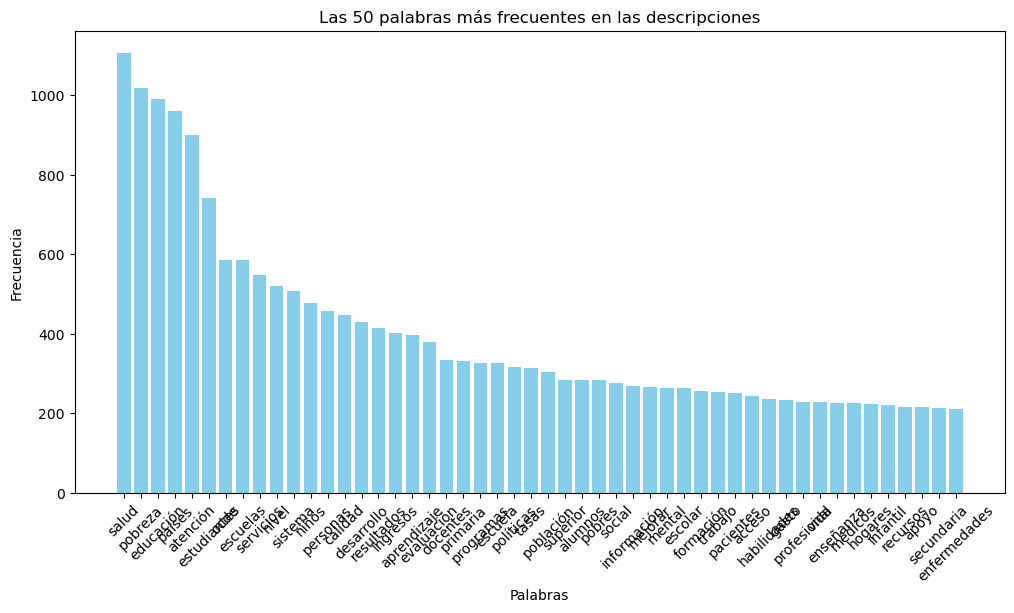

In [409]:
from collections import Counter
import matplotlib.pyplot as plt

# Aplanar la lista de tokens
all_tokens = [token for tokens_list in df['tokens'] for token in tokens_list]

# Contar frecuencia de palabras
word_counts = Counter(all_tokens)

# Obtener las 50 palabras más comunes
most_common_words = word_counts.most_common(50)

# Crear dataframe para visualización
freq_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

print("Las 50 palabras más frecuentes en las descripciones:")
display(freq_df)

# Graficar las palabras más frecuentes
plt.figure(figsize=(12,6))
plt.bar(freq_df['Word'], freq_df['Frequency'], color='skyblue')
plt.xticks(rotation=45)
plt.title('Las 50 palabras más frecuentes en las descripciones')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.show()

Los resultados muestran que las palabras más frecuentes correspoden a salud, pobreza y educación, lo cual hace sentido porque son consistentes con el contexto del proyecto. Esto se debe a que el ODS 1 corresponde a "Fin de la pobreza", el 3 a "Salud y Bienestar" y el 4 a "Educación de calidad". Adicionalmente, se puede decir que como "salud" es la más frecuente, es posible que sea un indicador de que las personas tienen mas opiciones acerca del bienestar o servicios médicos que sobre pobreza o educación, aunque las tres reflejan un balance. 

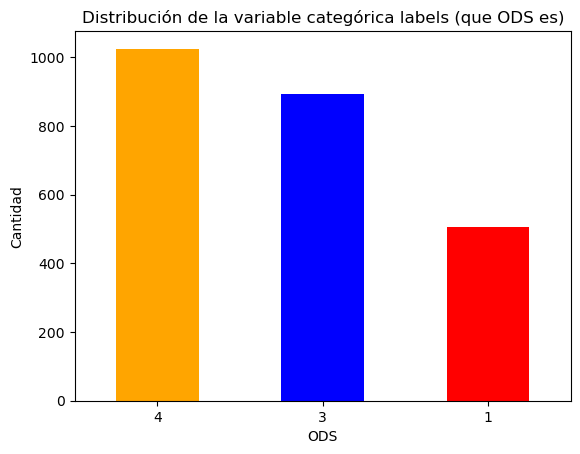

In [410]:
#Graficar distribución. Tambien queremos ver que tantos registros hay por cada label (ODS)
df['labels'].value_counts().plot(kind='bar', color=['orange', 'blue', 'red'])
plt.title('Distribución de la variable categórica labels (que ODS es)')
plt.xlabel('ODS')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.show()

### Creación de un DataFrame con TF-IDF de palabras representativas y variable objetivo

In [411]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Las 20 palabras más frecuentes ya están en 'most_common_words'
top_50_words = [word for word, _ in most_common_words]

# Definir vectorizador TF-IDF con vocabulario limitado
vectorizer = TfidfVectorizer(vocabulary=top_50_words)

# Aplicar tf-idf sobre la columna original Description
tfidf_matrix = vectorizer.fit_transform(df['textos'].fillna(''))

# Convertir matriz tf-idf en DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=top_50_words)

# Construir DataFrame final con columnas indicadas
final_df = pd.concat([df[['textos', 'labels']], tfidf_df], axis=1)

print("Primeras filas del DataFrame final con TF-IDF y variable objetivo:")
display(final_df.head())

Primeras filas del DataFrame final con TF-IDF y variable objetivo:


,textos,labels,salud,pobreza,educación,países,atención,estudiantes,ocde,escuelas,...,profesional,vida,enseñanza,médicos,hogares,infantil,recursos,apoyo,secundaria,enfermedades
0,"""Aprendizaje"" y ""educación"" se consideran sinónimos de escolarización formal. Las organizaciones auxiliares, como las editoriales de educación, las juntas examinadoras y las organizaciones de formación de docentes, se consideran extensiones de los acuerdos establecidos por los gobiernos. Este marco de comprensión se ha vuelto cada vez más inadecuado.",4,0.000000,0.0,0.639038,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Para los niños más pequeños (bebés y niños pequeños), la capacitación especializada y práctica parece estar más fuertemente asociada con la calidad pedagógica y los resultados cognitivos y sociales. Los educadores de la primera infancia se encuentran con entornos sociales cada vez más complejos y se encuentran con una multiplicidad de antecedentes y experiencias familiares. Estos factores crean imperativos para adoptar nuevas pedagogías y prácticas organizacionales para acomodar este pluralismo (Elliott, 2006).",4,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Además, la formación de especialistas en medicina general también incluye tareas que requieren un conocimiento más profundo de problemas comunes de salud pública, incluida la salud mental (Cuestionario de salud mental de la OCDE, 2013). Dado que no hay control en la atención primaria para limitar el acceso a los servicios de salud (mental) especializados, muchos pacientes que necesitan tratamiento (para trastornos mentales graves en particular) pueden buscar atención de nivel especializado directamente. Los servicios de especialistas en psiquiatría se brindan principalmente en las salas ambulatorias de psiquiatría ubicadas en los hospitales generales.",3,0.522145,0.0,0.000000,0.000000,0.276441,0.00000,0.146844,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"En los países de la OCDE se tiende a pasar de los cursos obligatorios a los optativos, abiertos a estudiantes de distintas facultades y escuelas. Este planteamiento facilita la formación de equipos de estudiantes con distintas formaciones e intereses. El trabajo en equipos interdisciplinares permite a los individuos concentrarse en lo que mejor saben y les gusta y, al mismo tiempo, familiarizarse con nuevos conocimientos que pueden asociarse a una nueva forma de resolver un problema o crear un nuevo producto o servicio. No está claro hasta qué punto estos cursos utilizan métodos pedagógicos creativos y se adaptan a las necesidades de los estudiantes de grado, postgrado y licenciatura.",4,0.000000,0.0,0.000000,0.217381,0.000000,0.77104,0.261671,0.279251,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Este grupo se centró en las personas que padecen trastornos mentales con comorbilidad de abuso de sustancias (mientras que la demencia, la discapacidad intelectual y el abuso de sustancias por sà solos quedaron excluidos del ámbito de análisis). Con 90 millones de euros de financiación, la comisión dispuso de tres años para ""iniciar y apoyar el desarrollo de proyectos a todos los niveles (tratamiento médico, mejora de los servicios, proyectos de vivienda, mejoras legislativas y organizativas) y proponer las medidas necesarias para elevar de forma permanente el nivel de los servicios de salud mental"".",3,0.278417,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [412]:
final_df.to_csv('procesamientoTextosODS.csv', index=False, sep=';')

## Parte 3: Modelado y Evaluacion

In [413]:
import pandas as pd
# Para preparar los datos
from sklearn.preprocessing import LabelEncoder
# Para crear el arbol de decisión 
from sklearn.tree import DecisionTreeClassifier 
# Para usar KNN como clasificador
from sklearn.neighbors import KNeighborsClassifier
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para evaluar el modelo
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score

# Versiones anteriores a 1.2 de sklearn: from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
# Para la validación cruzada
from sklearn.model_selection import KFold 
#Librerías para la visualización
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns 
from sklearn import tree
import sklearn as sklearn

In [414]:
print('The scikit-learn version is {}.'.format(sklearn.__version__)) 

The scikit-learn version is 1.5.2.


In [415]:

df_procesado = pd.read_csv(
    "procesamientoTextosODS.csv",
    sep=";",              # separador correcto
    quotechar='"',        # reconoce comillas en los textos
    encoding="utf-8-sig"  # evita problemas de caracteres especiales
)

# Mostramos las primeras filas para conocer la estructura de los datos
print("Primera filas del dataset:")
display(df_procesado.head())

Primera filas del dataset:


,textos,labels,salud,pobreza,educación,países,atención,estudiantes,ocde,escuelas,...,profesional,vida,enseñanza,médicos,hogares,infantil,recursos,apoyo,secundaria,enfermedades
0,"""Aprendizaje"" y ""educación"" se consideran sinónimos de escolarización formal. Las organizaciones auxiliares, como las editoriales de educación, las juntas examinadoras y las organizaciones de formación de docentes, se consideran extensiones de los acuerdos establecidos por los gobiernos. Este marco de comprensión se ha vuelto cada vez más inadecuado.",4,0.000000,0.0,0.639038,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Para los niños más pequeños (bebés y niños pequeños), la capacitación especializada y práctica parece estar más fuertemente asociada con la calidad pedagógica y los resultados cognitivos y sociales. Los educadores de la primera infancia se encuentran con entornos sociales cada vez más complejos y se encuentran con una multiplicidad de antecedentes y experiencias familiares. Estos factores crean imperativos para adoptar nuevas pedagogías y prácticas organizacionales para acomodar este pluralismo (Elliott, 2006).",4,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Además, la formación de especialistas en medicina general también incluye tareas que requieren un conocimiento más profundo de problemas comunes de salud pública, incluida la salud mental (Cuestionario de salud mental de la OCDE, 2013). Dado que no hay control en la atención primaria para limitar el acceso a los servicios de salud (mental) especializados, muchos pacientes que necesitan tratamiento (para trastornos mentales graves en particular) pueden buscar atención de nivel especializado directamente. Los servicios de especialistas en psiquiatría se brindan principalmente en las salas ambulatorias de psiquiatría ubicadas en los hospitales generales.",3,0.522145,0.0,0.000000,0.000000,0.276441,0.00000,0.146844,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"En los países de la OCDE se tiende a pasar de los cursos obligatorios a los optativos, abiertos a estudiantes de distintas facultades y escuelas. Este planteamiento facilita la formación de equipos de estudiantes con distintas formaciones e intereses. El trabajo en equipos interdisciplinares permite a los individuos concentrarse en lo que mejor saben y les gusta y, al mismo tiempo, familiarizarse con nuevos conocimientos que pueden asociarse a una nueva forma de resolver un problema o crear un nuevo producto o servicio. No está claro hasta qué punto estos cursos utilizan métodos pedagógicos creativos y se adaptan a las necesidades de los estudiantes de grado, postgrado y licenciatura.",4,0.000000,0.0,0.000000,0.217381,0.000000,0.77104,0.261671,0.279251,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Este grupo se centró en las personas que padecen trastornos mentales con comorbilidad de abuso de sustancias (mientras que la demencia, la discapacidad intelectual y el abuso de sustancias por sà solos quedaron excluidos del ámbito de análisis). Con 90 millones de euros de financiación, la comisión dispuso de tres años para ""iniciar y apoyar el desarrollo de proyectos a todos los niveles (tratamiento médico, mejora de los servicios, proyectos de vivienda, mejoras legislativas y organizativas) y proponer las medidas necesarias para elevar de forma permanente el nivel de los servicios de salud mental"".",3,0.278417,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 1) Construccion del modelo 1 - Arbol de Decisión

In [416]:
#Separar la variable de entrada a la variable objetivo
Y=df_procesado["labels"]
#Del conjunto de datos se elimina la variable labels
X = df_procesado.drop(columns=["labels", "textos"])

Dividr en train y en test

In [417]:
# Dividimos los datos en entrenamiento y test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [418]:
# Creación del objeto de arbol de decisión. Utilicemos como criterio de pureza la entropía.
arbol = DecisionTreeClassifier(criterion='entropy', max_depth = 4, random_state = 0)
arbol

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

In [419]:
# Entrenamiento del modelo de arbol de decisión con los datos de entrenamiento.
arbol = arbol.fit(X_train,Y_train)


In [420]:
# Determinamos las predicciones del modelo sobre el conjunto test.
y_pred = arbol.predict(X_test)

In [421]:
 # Se genera la matriz de confusión
cm = confusion_matrix(Y_test, y_pred)
print(cm)

[[ 72  21   5]
 [  2 168   4]
 [  1  63 149]]


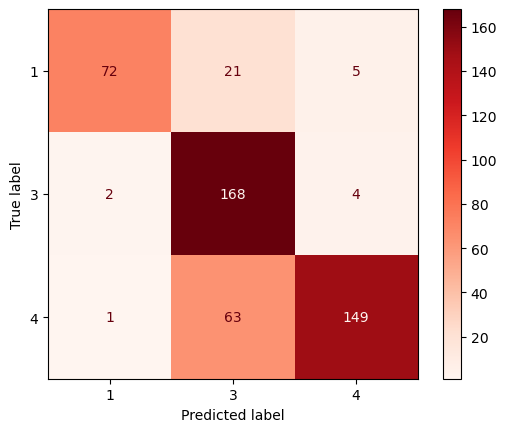

In [422]:
# Se puede visualizar la matriz de confusión
#plot_confusion_matrix(arbol, X_test, Y_test)  
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=arbol.classes_)
disp.plot(cmap=plt.cm.Reds)

plt.show()

Con base en lo visto en la matriz de confusión, es posible afirmar que en general hay un gran número de verdaderos positivos (VP), dando a entender que el modelo es mayoritariamente acertado. Sin embargo, también es posible ver que la clase con la que se obtuvo un mejor desempeño corresponde al ODS 3, teniendo en cuenta que tiene menos errores. Por lo tanto, se puede decir que es más fácil para el modelo hacer la clasificación para el ODS 3, aunque para el  caso del ODS 4 hay errores de clasificación teniendo en cuenta que el modelo por error clasifica los textos de este como si fueran parte del 3 y también se ve reflejaodo para el caso del 1 pero en menor proporción. Por ende, se puede decir que este error pudo darse porque para los tres casos, existen palabras que no son exclusivas para un solo ODS, por ejemplo, "niños", "servicios", "personas", etc. 

In [423]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, ConfusionMatrixDisplay
)

# Exactitud
print(f"Exactitud: {accuracy_score(Y_test, y_pred):.3f}")

# Promedios para multiclase:
# - macro: media simple entre clases (todas valen igual; bueno con desbalance)
# - weighted: pondera por soporte (tamaño de cada clase)
print(f"Precision (macro): {precision_score(Y_test, y_pred, average='macro', zero_division=0):.3f}")
print(f"Recall (macro):    {recall_score(Y_test, y_pred, average='macro', zero_division=0):.3f}")
print(f"F1 (macro):        {f1_score(Y_test, y_pred, average='macro', zero_division=0):.3f}")

print(f"Precision (weighted): {precision_score(Y_test, y_pred, average='weighted', zero_division=0):.3f}")
print(f"Recall (weighted):    {recall_score(Y_test, y_pred, average='weighted', zero_division=0):.3f}")
print(f"F1 (weighted):        {f1_score(Y_test, y_pred, average='weighted', zero_division=0):.3f}")

# Reporte por clase
print("\nReporte por clase:")
print(classification_report(Y_test, y_pred, digits=3, zero_division=0))



Exactitud: 0.802
Precision (macro): 0.857
Recall (macro):    0.800
F1 (macro):        0.808
Precision (weighted): 0.847
Recall (weighted):    0.802
F1 (weighted):        0.804

Reporte por clase:
              precision    recall  f1-score   support

           1      0.960     0.735     0.832        98
           3      0.667     0.966     0.789       174
           4      0.943     0.700     0.803       213

    accuracy                          0.802       485
   macro avg      0.857     0.800     0.808       485
weighted avg      0.847     0.802     0.804       485



#### Interpretación del primer modelo

In [424]:
importancia = arbol.feature_importances_
importancia

array([0.27372027, 0.45822866, 0.12721892, 0.        , 0.        ,
       0.11491558, 0.00361731, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.007987  , 0.        ,
       0.        , 0.00811904, 0.00619323, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [425]:
importancia_atributo= pd.DataFrame(data={"Atributo": X_train.columns, "Importancia": importancia})
importancia_atributo= importancia_atributo.sort_values(by= "Importancia", ascending= False).reset_index(drop=True)
importancia_atributo

,Atributo,Importancia
0,pobreza,0.458229
1,salud,0.273720
2,educación,0.127219
3,estudiantes,0.114916
4,ingresos,0.008119
5,calidad,0.007987
6,aprendizaje,0.006193
7,ocde,0.003617
8,atención,0.000000
9,países,0.000000


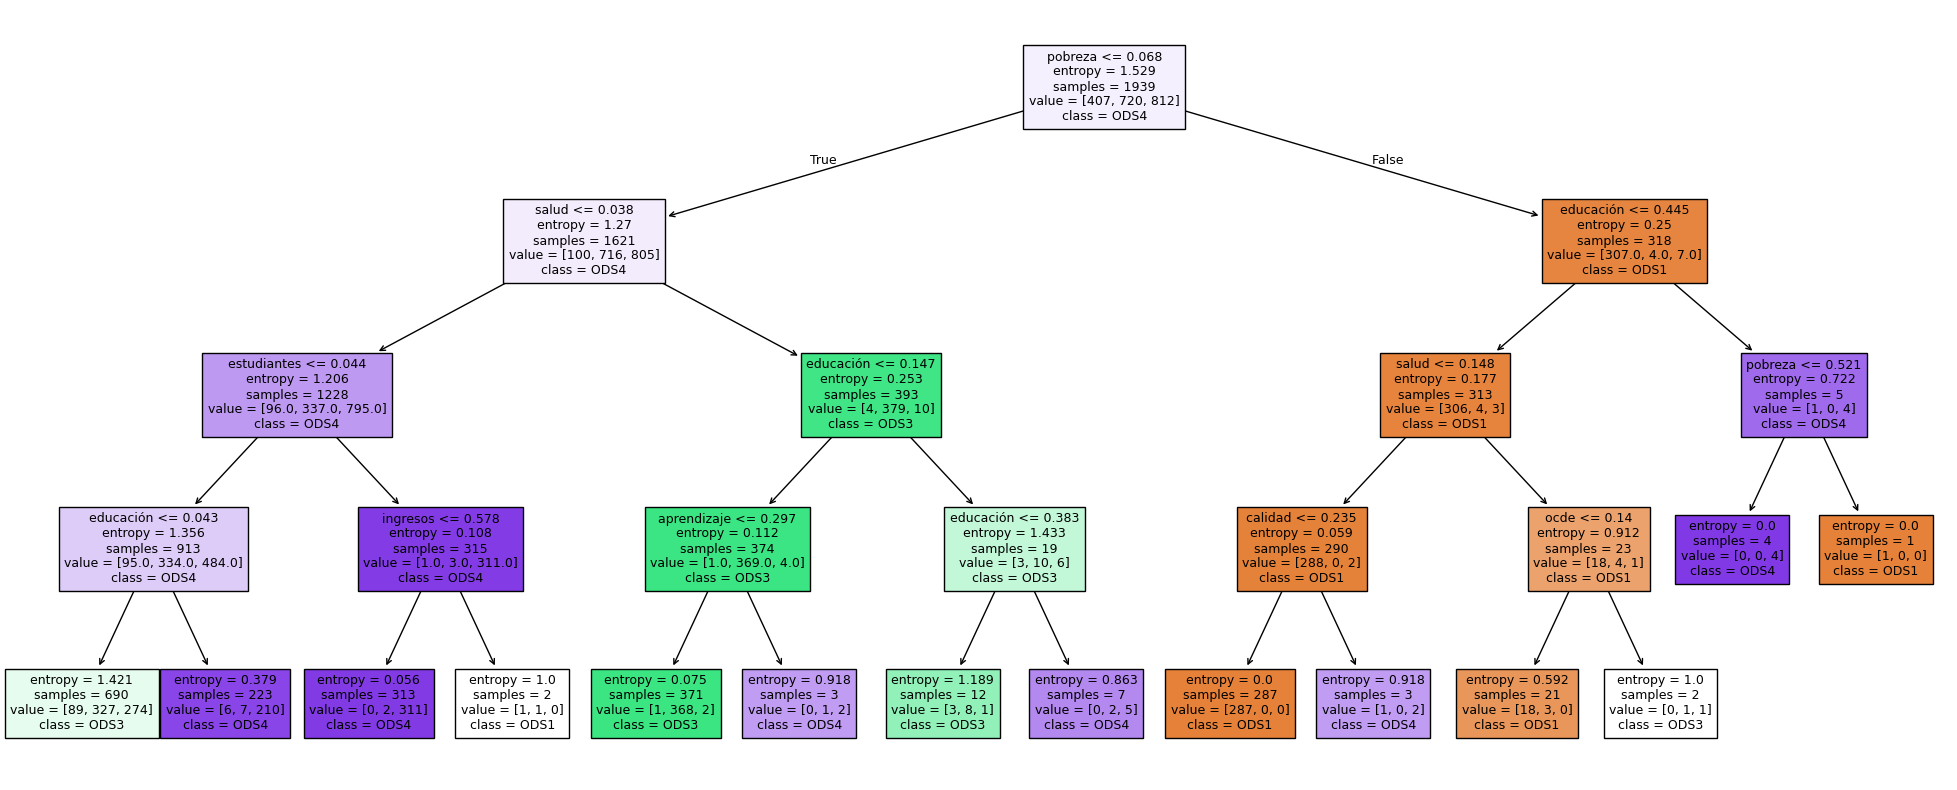

In [426]:
from sklearn import tree

# Nombres de features como lista
feature_names = list(X.columns)


class_names = [f"ODS{c}" for c in arbol.classes_] 

plt.figure(figsize=(25, 10))
_ = tree.plot_tree(
    arbol,
    max_depth=arbol.get_depth(),   
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    fontsize=9
)
plt.show()


#### Contrucción del modelo con búsqueda de hiperparámetros

In [427]:
# Fijemos el número de particiones. Utilizaremos K = 10.
particiones = KFold(n_splits=10, shuffle=True, random_state = 0)

In [428]:
# Establecemos el espacio de búsqueda para los hiperparámetros que deseamos ajustar. 
param_grid = {'criterion':['gini', 'entropy'],'max_depth':[4,6,8,10,15,20]}

In [429]:
# Definimos el modelo sin ningún valor de estos hiperparámetros
arbol = DecisionTreeClassifier(random_state=0)

In [430]:
# Ahora utilizamos GridSearch sobre el grid definido y con 10 particiones en la validación cruzada.
mejor_modelo = GridSearchCV(arbol, param_grid, cv=particiones)
# Ajuste del modelo
mejor_modelo.fit(X_train, Y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10, 15, 20]})

In [431]:
GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10,15, 20]})

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10, 15, 20]})

In [432]:
# Podemos ver cuál fue el resultado de la búsqueda (mejores valores de hiperparámetros)
mejor_modelo.best_params_

{'criterion': 'gini', 'max_depth': 20}

In [433]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predicciones
y_pred_train = arbol_final.predict(X_train)
y_pred_test = arbol_final.predict(X_test)

# Exactitud
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test, y_pred_test))

# Métricas sobre test
print(f"Precision (macro):   {precision_score(Y_test, y_pred_test, average='macro', zero_division=0):.3f}")
print(f"Recall (macro):      {recall_score(Y_test, y_pred_test, average='macro', zero_division=0):.3f}")
print(f"F1 (macro):          {f1_score(Y_test, y_pred_test, average='macro', zero_division=0):.3f}")

print(f"Precision (weighted): {precision_score(Y_test, y_pred_test, average='weighted', zero_division=0):.3f}")
print(f"Recall (weighted):    {recall_score(Y_test, y_pred_test, average='weighted', zero_division=0):.3f}")
print(f"F1 (weighted):        {f1_score(Y_test, y_pred_test, average='weighted', zero_division=0):.3f}")


Exactitud sobre entrenamiento: 0.98
Exactitud sobre test: 0.92
Precision (macro):   0.912
Recall (macro):      0.905
F1 (macro):          0.908
Precision (weighted): 0.916
Recall (weighted):    0.915
F1 (weighted):        0.915


In [434]:
print(classification_report(Y_test, y_pred_test))

              precision    recall  f1-score   support

           1       0.90      0.86      0.88        98
           3       0.88      0.92      0.90       174
           4       0.95      0.94      0.94       213

    accuracy                           0.92       485
   macro avg       0.91      0.91      0.91       485
weighted avg       0.92      0.92      0.92       485



In [435]:
# Se genera la matriz de confusión
cm_best = confusion_matrix(Y_test, y_pred_test)
print(cm_best)

[[ 84  12   2]
 [  5 160   9]
 [  4   9 200]]


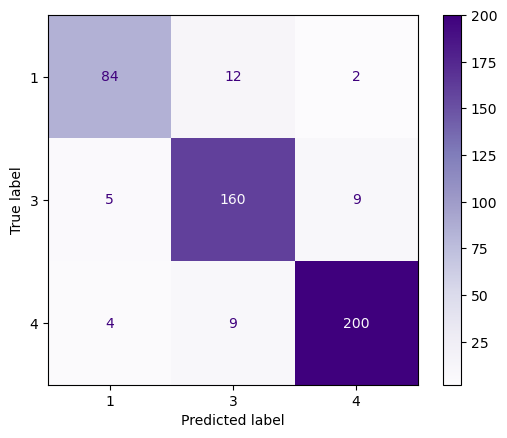

In [436]:
# Se puede visualizar la matriz de confusión
#plot_confusion_matrix(arbol, X_test, Y_test)  
disp = ConfusionMatrixDisplay(confusion_matrix=cm_best, display_labels=arbol_final.classes_)
disp.plot(cmap=plt.cm.Purples)

plt.show()

### 2) Construccion del modelo 2 - Arboles de Decision KNN 

In [437]:
#Separar la variable de entrada a la variable objetivo
Y=df_procesado["labels"]
#Del conjunto de datos se elimina la variable labels
X = df_procesado.drop(columns=["labels", "textos"])

In [438]:
 # Dividir los datos en entrenamiento y test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [439]:
import numpy as np
X_train_np = np.ascontiguousarray(X_train.to_numpy(dtype=np.float64))
X_test_np  = np.ascontiguousarray(X_test.to_numpy(dtype=np.float64))
neigh = KNeighborsClassifier(n_neighbors=5)  # puedes ajustar n_neighbors
neigh.fit(X_train_np, Y_train.to_numpy())
y_pred = neigh.predict(X_test_np)


In [440]:
# Se genera la matriz de confusión
cm2 = confusion_matrix(Y_test, y_pred)
print(cm2)

[[ 85  10   3]
 [  6 154  14]
 [ 11  13 189]]


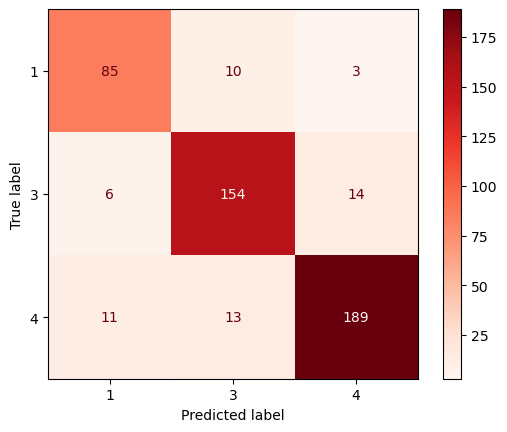

In [441]:
# Se puede visualizar la matriz de confusión
#plot_confusion_matrix(arbol, X_test, Y_test)  
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=neigh.classes_)
disp.plot(cmap=plt.cm.Reds)

plt.show()

In [442]:
# Mostrar reporte de clasificación
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           1       0.83      0.87      0.85        98
           3       0.87      0.89      0.88       174
           4       0.92      0.89      0.90       213

    accuracy                           0.88       485
   macro avg       0.87      0.88      0.88       485
weighted avg       0.88      0.88      0.88       485



In [443]:
# Separar target
Y = df_procesado["labels"]
print(Y)

# Seleccionar solo features numéricas, excluyendo labels
number_cols = df_procesado.select_dtypes(include=['int64','float64']).columns.drop("labels")
X = df_procesado[number_cols]

# Normalizar solo X
X_normalized = (X - X.min()) / (X.max() - X.min())

print(X_normalized.head())
print(Y.head())


0       4
1       4
2       3
3       4
4       3
       ..
2419    4
2420    4
2421    1
2422    3
2423    4
Name: labels, Length: 2424, dtype: int64
      salud  pobreza  educación    países  atención  estudiantes      ocde  \
0  0.000000      0.0   0.639038  0.000000  0.000000      0.00000  0.000000   
1  0.000000      0.0   0.000000  0.000000  0.000000      0.00000  0.000000   
2  0.522145      0.0   0.000000  0.000000  0.276441      0.00000  0.152814   
3  0.000000      0.0   0.000000  0.217381  0.000000      0.77104  0.272309   
4  0.278417      0.0   0.000000  0.000000  0.000000      0.00000  0.000000   

   escuelas  servicios     nivel  ...  profesional  vida  enseñanza  médicos  \
0  0.000000   0.000000  0.000000  ...          0.0   0.0        0.0      0.0   
1  0.000000   0.000000  0.000000  ...          0.0   0.0        0.0      0.0   
2  0.000000   0.302062  0.151141  ...          0.0   0.0        0.0      0.0   
3  0.279251   0.000000  0.000000  ...          0.0   0.0    

In [444]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# X_normalized: solo features normalizadas (sin 'labels')
# Y: labels SIN normalizar (clases discretas)

X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, Y, test_size=0.2, random_state=0, stratify=Y
)

X_train_np = np.ascontiguousarray(X_train.to_numpy(dtype=np.float64))
X_test_np  = np.ascontiguousarray(X_test.to_numpy(dtype=np.float64))
y_train_np = np.asarray(y_train)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_np, y_train_np)
y_pred = knn.predict(X_test_np)

# Promedios para multiclase:
# - macro: media simple entre clases (todas valen igual; bueno con desbalance)
# - weighted: pondera por soporte (tamaño de cada clase)
print(f"Precision (macro): {precision_score(y_test, y_pred, average='macro', zero_division=0):.3f}")
print(f"Recall (macro):    {recall_score(y_test, y_pred, average='macro', zero_division=0):.3f}")
print(f"F1 (macro):        {f1_score(y_test, y_pred, average='macro', zero_division=0):.3f}")

print(f"Precision (weighted): {precision_score(y_test, y_pred, average='weighted', zero_division=0):.3f}")
print(f"Recall (weighted):    {recall_score(y_test, y_pred, average='weighted', zero_division=0):.3f}")
print(f"F1 (weighted):        {f1_score(y_test, y_pred, average='weighted', zero_division=0):.3f}")


Precision (macro): 0.891
Recall (macro):    0.898
F1 (macro):        0.894
Precision (weighted): 0.900
Recall (weighted):    0.899
F1 (weighted):        0.899


In [445]:
X_normalized.describe() 

,salud,pobreza,educación,países,atención,estudiantes,ocde,escuelas,servicios,nivel,...,profesional,vida,enseñanza,médicos,hogares,infantil,recursos,apoyo,secundaria,enfermedades
count,2424.000000,2424.000000,2424.000000,2424.000000,2424.000000,2424.000000,2424.000000,2424.000000,2424.00000,2424.000000,...,2424.000000,2424.000000,2424.000000,2424.000000,2424.000000,2424.000000,2424.000000,2424.000000,2424.000000,2424.000000
mean,0.091898,0.093512,0.081764,0.084609,0.073321,0.065616,0.056409,0.056244,0.05129,0.052088,...,0.025138,0.028278,0.026700,0.027707,0.028609,0.024078,0.026580,0.028155,0.021625,0.028058
std,0.199099,0.232129,0.178928,0.175059,0.175549,0.170163,0.152844,0.165383,0.14049,0.134140,...,0.103829,0.117931,0.106015,0.123376,0.121514,0.106869,0.107235,0.108621,0.092887,0.125266
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.100563,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [446]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

# Lista de Hiperparámetros a afinar
n_neighbors = list(range(1,10))
n_odd_neighbors = list(filter(lambda x: (x % 2 != 0), n_neighbors))
p=[1,2] #Función de distancia 1: manhattan, 2: euclidean, otro valor: minkowski

#Convert to dictionary
hyperparameters = dict(n_neighbors=n_odd_neighbors, p=p)

#Create new KNN object
knn_2 = KNeighborsClassifier()

#Use GridSearch
mejor_modelo_knn = GridSearchCV(knn_2, hyperparameters, cv=10)

#Fit the model
mejor_modelo_knn.fit(X_train_np, y_train_np)

#Print The value of best Hyperparameters
print('Best p:', mejor_modelo_knn.best_estimator_.get_params()['p'])
print('Best n_neighbors:', mejor_modelo_knn.best_estimator_.get_params()['n_neighbors'])

Best p: 1
Best n_neighbors: 7


In [447]:
 # Obtener el mejor modelo.
neigh_final = mejor_modelo_knn.best_estimator_
# Probemos ahora este modelo sobre test.
y_pred_train = neigh_final.predict(X_train_np)
y_pred_test = neigh_final.predict(X_test_np)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(y_train_np, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(y_test, y_pred_test))


Exactitud sobre entrenamiento: 0.92
Exactitud sobre test: 0.88


In [448]:
# Se genera la matriz de confusión
cm_best_knn = confusion_matrix(y_test, y_pred_test)
print(cm_best_knn)

[[ 88  11   2]
 [  9 163   7]
 [  5  24 176]]


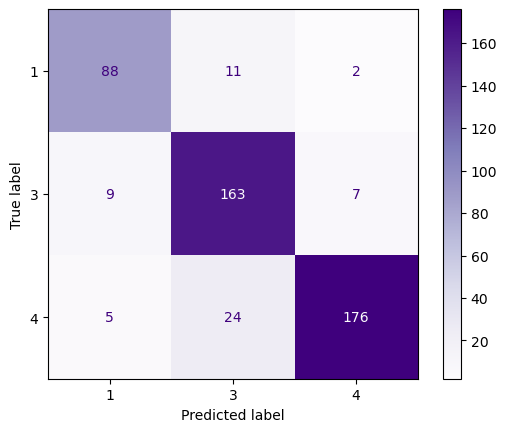

In [449]:
# Se puede visualizar la matriz de confusión
#plot_confusion_matrix(arbol, X_test, Y_test)  
disp = ConfusionMatrixDisplay(confusion_matrix=cm_best_knn, display_labels=neigh_final.classes_)
disp.plot(cmap=plt.cm.Purples)

plt.show()

In [450]:
print(f"Precision (macro): {precision_score(y_test, y_pred_test, average='macro', zero_division=0):.3f}")
print(f"Recall (macro):    {recall_score(y_test, y_pred_test, average='macro', zero_division=0):.3f}")
print(f"F1 (macro):        {f1_score(y_test, y_pred_test, average='macro', zero_division=0):.3f}")

print(f"Precision (weighted): {precision_score(y_test, y_pred_test, average='weighted', zero_division=0):.3f}")
print(f"Recall (weighted):    {recall_score(y_test, y_pred_test, average='weighted', zero_division=0):.3f}")
print(f"F1 (weighted):        {f1_score(y_test, y_pred_test, average='weighted', zero_division=0):.3f}")

Precision (macro): 0.879
Recall (macro):    0.880
F1 (macro):        0.878
Precision (weighted): 0.886
Recall (weighted):    0.880
F1 (weighted):        0.881


### 3) Construccion del modelo 3 

In [451]:
#Separar la variable de entrada a la variable objetivo
Y=df_procesado["labels"]
#Del conjunto de datos se elimina la variable labels
X = df_procesado.drop(columns=["labels", "textos"])

In [452]:
# Dividimos los datos en entrenamiento y test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [453]:
#Naive Bayes
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# NB requiere features no negativas por ende consideramos este algoritmo porque al realizar td idf se cumplen estas condiciones.

nb = ComplementNB()  
nb.fit(X_train, Y_train)

# Predicciones
y_pred_nb = nb.predict(X_test)

# Métricas
acc = accuracy_score(Y_test, y_pred_nb)
prec_macro, rec_macro, f1_macro, _ = precision_recall_fscore_support(Y_test, y_pred_nb, average='macro', zero_division=0)
prec_w, rec_w, f1_w, _ = precision_recall_fscore_support(Y_test, y_pred_nb, average='weighted', zero_division=0)

print("Naive Bayes")
print(f"Exactitud            : {acc:.4f}")
print(f"Precisión (macro)    : {prec_macro:.4f}")
print(f"Recall (macro)       : {rec_macro:.4f}")
print(f"F1 (macro)           : {f1_macro:.4f}")
print(f"Precisión (weighted) : {prec_w:.4f}")
print(f"Recall (weighted)    : {rec_w:.4f}")
print(f"F1 (weighted)        : {f1_w:.4f}\n")

print("Reporte de clasificación:")
print(classification_report(Y_test, y_pred_nb, zero_division=0))




Naive Bayes
Exactitud            : 0.9113
Precisión (macro)    : 0.8955
Recall (macro)       : 0.9071
F1 (macro)           : 0.8992
Precisión (weighted) : 0.9156
Recall (weighted)    : 0.9113
F1 (weighted)        : 0.9118

Reporte de clasificación:
              precision    recall  f1-score   support

           1       0.79      0.91      0.85        98
           3       0.94      0.85      0.89       174
           4       0.95      0.96      0.96       213

    accuracy                           0.91       485
   macro avg       0.90      0.91      0.90       485
weighted avg       0.92      0.91      0.91       485



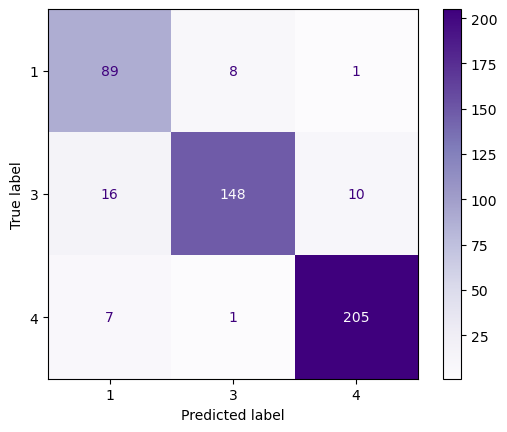

In [454]:
# Se genera la matriz de confusión
cm_bayes = confusion_matrix(Y_test, y_pred_nb)


# Se puede visualizar la matriz de confusión
#plot_confusion_matrix(arbol, X_test, Y_test)  
disp = ConfusionMatrixDisplay(confusion_matrix=cm_bayes, display_labels=nb.classes_)
disp.plot(cmap=plt.cm.Purples)

plt.show()

## Parte 4: Resultados

In [455]:
df_prueba = pd.read_excel('Datos de prueba_proyecto.xlsx')

# Primeras filas de los datos para entender mejor su estructura
print("Primeras 5 filas del dataset:")
pd.set_option("display.max_colwidth", None)  # muestra todo el texto sin cortar
display(df_prueba.head())


Primeras 5 filas del dataset:


,Textos_espanol
0,"El rector, que es el representante local del Ministerio de Educación, tiene la responsabilidad principal de procesar la evaluación. A pesar de esta centralización, el sistema francés se basa en gran medida en el principio de participación y, por lo tanto, los docentes están involucrados en todos los procesos (INCA France, 2008). Aunque existían diferencias entre los procedimientos de evaluación en los Länder alemanes, la única herramienta de verificación era la recopilación de algunos documentos de muestra para la verificación central. A estas alturas, sin embargo, la mayoría de los Länder han introducido exámenes centrales hasta cierto punto."
1,"Tenga en cuenta que todos los programas antipobreza tienen condiciones, incluso aquellos caracterizados como 'incondicionales'. Nuestro enfoque está en las condiciones de comportamiento vinculadas a los programas antipobreza. Las condiciones más utilizadas son aquellas que incentivan la creación de activos físicos (generalmente a nivel comunitario) o la acumulación de capital humano en términos de educación o salud."
2,"Debido a que son en gran medida invisibles, estas formas de trabajo infantil son las más difíciles de abordar. Las trabajadoras del hogar, en su mayoría niñas, se encuentran aisladas y sujetas a los caprichos y la disciplina arbitraria de sus empleadores, de quienes pueden sufrir abusos. El abuso sexual es frecuente pero rara vez procesado. La violencia o el abuso en el hogar o en el vecindario ahuyenta a muchos, como lo han demostrado estudios en ciudades tan diversas como Dhaka, Bangladesh y Moscú, Federación Rusa.67 La pobreza también juega un papel."
3,"Los recursos aún son limitados en este sector. Los servicios privados con fines de lucro y comunitarios (religiosos y seculares) son los principales proveedores directos de jardines de infancia y grupos de juego. A pesar del crecimiento significativo en este sector, todavía hay una serie de desafíos para la provisión de un servicio más universal y consistente para los niños en edad preescolar."
4,"Durante el período 1985-2008, la educación primaria, secundaria y terciaria experimentó un aumento sin precedentes en la matrícula. La educación superior mostró el mayor crecimiento con un 93,1%, lo que representa un aumento anual del 4,1%. La mejora del acceso se refleja en el porcentaje de matriculación en educación superior en la cohorte de edad de 19 a 24 años, que creció del 0,6% en 1970 al 24,4% en 2007."


In [456]:
# Función para limpiar y tokenizar texto
def clean_tokenize(text):
    if pd.isnull(text):
        return []
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

# Aplicar la función a la columna 'textos'
df_prueba['tokens'] = df_prueba['Textos_espanol'].apply(clean_tokenize)

print("Ejemplos de tokens en los primeros textos:")
display(df_prueba[['Textos_espanol', 'tokens']].head())

Ejemplos de tokens en los primeros textos:


,Textos_espanol,tokens
0,"El rector, que es el representante local del Ministerio de Educación, tiene la responsabilidad principal de procesar la evaluación. A pesar de esta centralización, el sistema francés se basa en gran medida en el principio de participación y, por lo tanto, los docentes están involucrados en todos los procesos (INCA France, 2008). Aunque existían diferencias entre los procedimientos de evaluación en los Länder alemanes, la única herramienta de verificación era la recopilación de algunos documentos de muestra para la verificación central. A estas alturas, sin embargo, la mayoría de los Länder han introducido exámenes centrales hasta cierto punto.","[rector, representante, local, ministerio, educación, responsabilidad, principal, procesar, evaluación, pesar, centralización, sistema, francés, basa, gran, medida, principio, participación, docentes, involucrados, procesos, inca, france, 2008, aunque, existían, diferencias, procedimientos, evaluación, länder, alemanes, única, herramienta, verificación, recopilación, documentos, muestra, verificación, central, alturas, länder, introducido, exámenes, centrales, cierto, punto]"
1,"Tenga en cuenta que todos los programas antipobreza tienen condiciones, incluso aquellos caracterizados como 'incondicionales'. Nuestro enfoque está en las condiciones de comportamiento vinculadas a los programas antipobreza. Las condiciones más utilizadas son aquellas que incentivan la creación de activos físicos (generalmente a nivel comunitario) o la acumulación de capital humano en términos de educación o salud.","[cuenta, programas, antipobreza, condiciones, incluso, aquellos, caracterizados, incondicionales, enfoque, condiciones, comportamiento, vinculadas, programas, antipobreza, condiciones, utilizadas, aquellas, incentivan, creación, activos, físicos, generalmente, nivel, comunitario, acumulación, capital, humano, términos, educación, salud]"
2,"Debido a que son en gran medida invisibles, estas formas de trabajo infantil son las más difíciles de abordar. Las trabajadoras del hogar, en su mayoría niñas, se encuentran aisladas y sujetas a los caprichos y la disciplina arbitraria de sus empleadores, de quienes pueden sufrir abusos. El abuso sexual es frecuente pero rara vez procesado. La violencia o el abuso en el hogar o en el vecindario ahuyenta a muchos, como lo han demostrado estudios en ciudades tan diversas como Dhaka, Bangladesh y Moscú, Federación Rusa.67 La pobreza también juega un papel.","[debido, gran, medida, invisibles, formas, trabajo, infantil, difíciles, abordar, trabajadoras, hogar, niñas, encuentran, aisladas, sujetas, caprichos, disciplina, arbitraria, empleadores, sufrir, abusos, abuso, sexual, frecuente, rara, vez, procesado, violencia, abuso, hogar, vecindario, ahuyenta, demostrado, estudios, ciudades, tan, diversas, dhaka, bangladesh, moscú, federación, rusa67, pobreza, juega, papel]"
3,"Los recursos aún son limitados en este sector. Los servicios privados con fines de lucro y comunitarios (religiosos y seculares) son los principales proveedores directos de jardines de infancia y grupos de juego. A pesar del crecimiento significativo en este sector, todavía hay una serie de desafíos para la provisión de un servicio más universal y consistente para los niños en edad preescolar.","[recursos, aún, limitados, sector, servicios, privados, fines, lucro, comunitarios, religiosos, seculares, principales, proveedores, directos, jardines, infancia, grupos, juego, pesar, crecimiento, significativo, sector, todavía, serie, desafíos, provisión, servicio, universal, consistente, niños, edad, preescolar]"
4,"Durante el período 1985-2008, la educación primaria, secundaria y terciaria experimentó un aumento sin precedentes en la matrícula. La educación superior mostró el mayor crecimiento con un 93,1%, lo que representa un aumento anual del 4,1%. La mejora del acceso se refleja en el porcentaje de matriculación en educación superior en la cohorte de edad de 19 a 24 años, q

In [457]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Las 20 palabras más frecuentes ya están en 'most_common_words'
top_50_words_prueba = [word for word, _ in most_common_words]
print(top_50_words_prueba)

# Definir vectorizador TF-IDF con vocabulario limitado
vectorizer = TfidfVectorizer(vocabulary=top_50_words_prueba)

# Aplicar tf-idf sobre la columna original Description
tfidf_matrix = vectorizer.fit_transform(df_prueba['Textos_espanol'].fillna(''))

# Convertir matriz tf-idf en DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=top_50_words_prueba)

# Construir DataFrame final con columnas indicadas
final_df = pd.concat([df_prueba[['Textos_espanol']], tfidf_df], axis=1)

print("Primeras filas del DataFrame final con TF-IDF y variable objetivo:")
display(final_df.head())

['salud', 'pobreza', 'educación', 'países', 'atención', 'estudiantes', 'ocde', 'escuelas', 'servicios', 'nivel', 'sistema', 'niños', 'personas', 'calidad', 'desarrollo', 'resultados', 'ingresos', 'aprendizaje', 'evaluación', 'docentes', 'primaria', 'programas', 'escuela', 'políticas', 'tasas', 'población', 'superior', 'alumnos', 'pobres', 'social', 'información', 'mejorar', 'mental', 'escolar', 'formación', 'trabajo', 'pacientes', 'acceso', 'habilidades', 'gasto', 'profesional', 'vida', 'enseñanza', 'médicos', 'hogares', 'infantil', 'recursos', 'apoyo', 'secundaria', 'enfermedades']
Primeras filas del DataFrame final con TF-IDF y variable objetivo:


,Textos_espanol,salud,pobreza,educación,países,atención,estudiantes,ocde,escuelas,servicios,...,profesional,vida,enseñanza,médicos,hogares,infantil,recursos,apoyo,secundaria,enfermedades
0,"El rector, que es el representante local del Ministerio de Educación, tiene la responsabilidad principal de procesar la evaluación. A pesar de esta centralización, el sistema francés se basa en gran medida en el principio de participación y, por lo tanto, los docentes están involucrados en todos los procesos (INCA France, 2008). Aunque existían diferencias entre los procedimientos de evaluación en los Länder alemanes, la única herramienta de verificación era la recopilación de algunos documentos de muestra para la verificación central. A estas alturas, sin embargo, la mayoría de los Länder han introducido exámenes centrales hasta cierto punto.",0.000000,0.000000,0.268502,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
1,"Tenga en cuenta que todos los programas antipobreza tienen condiciones, incluso aquellos caracterizados como 'incondicionales'. Nuestro enfoque está en las condiciones de comportamiento vinculadas a los programas antipobreza. Las condiciones más utilizadas son aquellas que incentivan la creación de activos físicos (generalmente a nivel comunitario) o la acumulación de capital humano en términos de educación o salud.",0.287525,0.000000,0.277816,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
2,"Debido a que son en gran medida invisibles, estas formas de trabajo infantil son las más difíciles de abordar. Las trabajadoras del hogar, en su mayoría niñas, se encuentran aisladas y sujetas a los caprichos y la disciplina arbitraria de sus empleadores, de quienes pueden sufrir abusos. El abuso sexual es frecuente pero rara vez procesado. La violencia o el abuso en el hogar o en el vecindario ahuyenta a muchos, como lo han demostrado estudios en ciudades tan diversas como Dhaka, Bangladesh y Moscú, Federación Rusa.67 La pobreza también juega un papel.",0.000000,0.397255,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.648918,0.000000,0.0,0.000000,0.0
3,"Los recursos aún son limitados en este sector. Los servicios privados con fines de lucro y comunitarios (religiosos y seculares) son los principales proveedores directos de jardines de infancia y grupos de juego. A pesar del crecimiento significativo en este sector, todavía hay una serie de desafíos para la provisión de un servicio más universal y consistente para los niños en edad preescolar.",0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.551221,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.659812,0.0,0.000000,0.0
4,"Durante el período 1985-2008, la educación primaria, secundaria y terciaria experimentó un aumento sin precedentes en la matrícula. La educación superior mostró el mayor crecimiento con un 93,1%, lo que representa un aumento anual del 4,1%. La mejora del acceso se refleja en el porcentaje de matriculación en educación superior en la cohorte de edad de 19 a 24 años, que creció del 0,6% en 1970 al 24,4% en 2007.",0.000000,0.000000,0.632699,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.334125,0.0


In [458]:
final_df = final_df.drop(columns=["Textos_espanol"])
display(final_df.head())

,salud,pobreza,educación,países,atención,estudiantes,ocde,escuelas,servicios,nivel,...,profesional,vida,enseñanza,médicos,hogares,infantil,recursos,apoyo,secundaria,enfermedades
0,0.000000,0.000000,0.268502,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
1,0.287525,0.000000,0.277816,0.0,0.0,0.0,0.0,0.0,0.000000,0.327518,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
2,0.000000,0.397255,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.648918,0.000000,0.0,0.000000,0.0
3,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.551221,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.659812,0.0,0.000000,0.0
4,0.000000,0.000000,0.632699,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.334125,0.0


In [459]:
# Supongamos que tu modelo se llama "arbol"
# Y tus datos de prueba no etiquetados están en un DataFrame llamado X_test
predicciones = arbol_final.predict(final_df)

# Mostrar resultados
print(predicciones)


[4 3 1 1 4 1 3 4 4 3 4 4 1 3 4 3 4 4 1 3 4 3 3 3 1 1 3 1 4 1 4 3 4 3 3 4 3
 4 4 4 4 4 1 3 3 3 3 4 3 4 3 4 3 4 4 3 1 4 1 4 1 3 1 3 3 3 1 3 4 3 3 3 4 4
 3 1 3 4 1 1 1 4 3 1 4 4 4 3 4 4 1 4 4 4 1 4 4 3 4 4 4 4 3 3 3 1 3 1 3 1 3
 3 3 3 3 1 3 1 3 3 3 1 4 3 3 1 1 1 3 3 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [460]:
# Añadir columna con las predicciones
df_prueba = df_prueba.drop(columns=["tokens"])

df_prueba["labels"] = predicciones

# Exportar a Excel
df_prueba.to_excel("datos_prueba_con_labels.xlsx", index=False)

print("Archivo generado: datos_prueba_con_labels.xlsx")


Archivo generado: datos_prueba_con_labels.xlsx
